## The Android App Market on Google Play





## Project Description

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention. The data for this project was scraped from the Google Play website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former. The data files are as follows:

    apps.csv : contains all the details of the apps on Google Play. These are the features that describe an app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.


## Guided Project

Through a series of guided steps, harness your complete data analyst toolbox to perform data wrangling, create visualizations, and carry out a descriptive and inferential analysis.

## Project Tasks

    1. Google Play Store apps and reviews
    
    2. Data cleaning
    
    3. Correcting data types
    
    4. Exploring app categories
    
    5. Distribution of app ratings
    
    6. Size and price of an app
    
    7. Relation between app category and app price
    
    8. Filter out "junk" apps
    
    9. Popularity of paid apps vs free apps
    
    10. Sentiment analysis of user reviews
    

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.


Let's take a look at the data, which consists of two files:

    apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


In [1]:
import pandas as pd


# # Read in dataset
#####################################################################################################################
apps = pd.read_csv('apps.csv')
#print(apps.head(3))
print('\n')

reviews = pd.read_csv('user_reviews.csv')
#print(reviews.head())


# Drop duplicates
#####################################################################################################################
print('before apps.drop_duplicate, ' + str(len(apps)))
apps = apps.drop_duplicates()
print('after apps.drop_duplicate, ' + str(len(apps)))

print('before reviews.drop_duplicate, ' + str(len(reviews)))
reviews = reviews.drop_duplicates()
print('after reviews.drop_duplicate, ' + str(len(reviews)))

print('\n')



# Have a look at a random sample of 5 rows
#####################################################################################################################
print(apps.sample(5))


# By default, it drop_duplicate rows based on all columns.  all column value of one row equal to another row
# To remove duplicates on specific column(s), use 'subset=col_name'.  drop rows if subset columns value are same 
#####################################################################################################################



before apps.drop_duplicate, 9659
after apps.drop_duplicate, 9659
before reviews.drop_duplicate, 64295
after reviews.drop_duplicate, 30679


      Unnamed: 0                             App          Category  Rating  \
8060        9180           Debra Care Conference          BUSINESS     NaN   
6062        7105                    CB On Mobile     COMMUNICATION     4.1   
8378        9504       Ek Biladi Jadi Video Song            FAMILY     NaN   
4313        5267  My Wild Pet: Online Animal Sim            FAMILY     4.5   
2477        3186                The Emirates App  TRAVEL_AND_LOCAL     4.4   

      Reviews   Size    Installs  Type Price Content Rating  \
8060        0    30M         50+  Free     0       Everyone   
6062      901  0.323    100,000+  Free     0           Teen   
8378        3   3.7M      5,000+  Free     0       Everyone   
4313    26916    67M    500,000+  Free     0       Everyone   
2477    22748    55M  1,000,000+  Free     0       Everyone   

          

## 2. Data cleaning

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.


In [2]:
print(help(str.replace))
#print('\n')

#print(help(pd.to_numeric))

Help on method_descriptor:

replace(self, old, new, count=-1, /)
    Return a copy with all occurrences of substring old replaced by new.
    
      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.
    
    If the optional argument count is given, only the first count occurrences are
    replaced.

None


In [2]:
# List of characters to remove
characters = [',', '$', '+', 'M', 'k']

# List of column names to clean
columns = ['Installs', 'Size', 'Price']


for i in columns:
    for c in characters:
        apps[i] = apps[i].str.replace(c, '', regex=True)
        #############################################################################################################
        #############################################################################################################
    
    apps[i] = pd.to_numeric(apps[i])


print(apps.sample(5))

print(type(apps['Price'][12]))
print(type(apps['Installs'][12]))
print(type(apps['Size'][32]))

      Unnamed: 0                                                App  \
5091        6087                             Battlefield™ Companion   
4613        5584                  CAPTCHA Pack for Sleep as Android   
9427       10602                          South Florida AA Meetings   
6667        7726                                    CQ SIGNAL PRO 5   
594          721  Japanese / English one-shop search dictionary ...   

       Category  Rating  Reviews  Size  Installs  Type  Price Content Rating  \
5091       GAME     4.0   263907  62.0  10000000  Free    0.0   Everyone 10+   
4613  LIFESTYLE     4.0      448   3.1     50000  Free    0.0       Everyone   
9427  LIFESTYLE     5.0       10  21.0      1000  Free    0.0       Everyone   
6667    FINANCE     NaN        0   1.6        10  Free    0.0       Everyone   
594   EDUCATION     3.9       61  18.0     50000  Free    0.0     Mature 17+   

         Genres      Last Updated Current Ver Android Ver  
5091     Action  November 1, 201

## 3. Exploring app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

    Which category has the highest share of (active) apps in the market?
    Is any specific category dominating the market?
    Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

                      App  % of Total
Category                             
FAMILY               1832       18.97
GAME                  959        9.93
TOOLS                 827        8.56
BUSINESS              420        4.35
MEDICAL               395        4.09
PERSONALIZATION       376        3.89
PRODUCTIVITY          374        3.87
LIFESTYLE             369        3.82
FINANCE               345        3.57
SPORTS                325        3.36
COMMUNICATION         315        3.26
HEALTH_AND_FITNESS    288        2.98
PHOTOGRAPHY           281        2.91
NEWS_AND_MAGAZINES    254        2.63
SOCIAL                239        2.47
BOOKS_AND_REFERENCE   222        2.30
TRAVEL_AND_LOCAL      219        2.27
SHOPPING              202        2.09
DATING                171        1.77
VIDEO_PLAYERS         163        1.69
MAPS_AND_NAVIGATION   131        1.36
EDUCATION             119        1.23
FOOD_AND_DRINK        112        1.16
ENTERTAINMENT         102        1.06
AUTO_AND_VEH

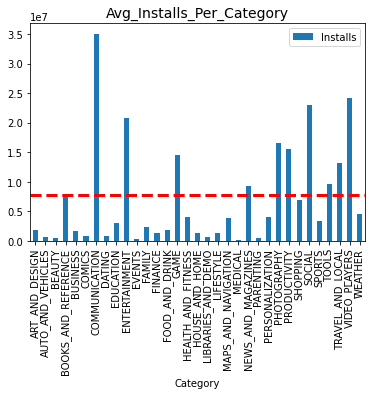

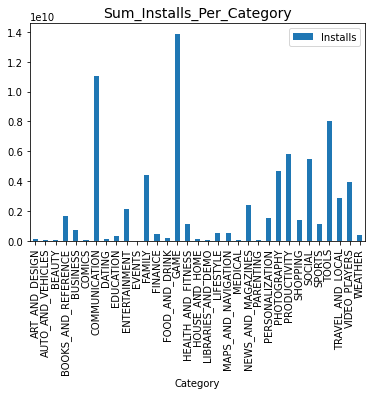

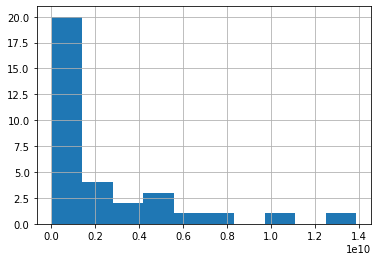

In [3]:
import matplotlib.pyplot as plt
import numpy as np

app_count_table = apps.pivot_table(values='App', 
                       index='Category', 
                       aggfunc=lambda x: len(x.unique())).sort_values('App', ascending=False)
                       ##############################################################################################
app_count_table['% of Total'] = round((app_count_table['App'] / app_count_table['App'].sum() * 100), 2)
print(app_count_table)


table = apps.pivot_table(values='Installs', 
                       index='Category', 
                       aggfunc=np.sum).sort_values('Installs', ascending=False)#.div(sum(index))

#####################################################################################################################
table['% of Total'] = round((table['Installs'] / table['Installs'].sum() * 100), 2)
print(table)


#    Which category has the highest share of (active) apps in the market?
        # I take Install numbers representing share of (active) apps, thus Games has highest share 14.7%
    
#    Is any specific category dominating the market?
        # Yes, Games 18.5%, Communication 14.7%, Tools 10.7%, all others less are than 7.7%

#    Which categories have the fewest number of apps?
        # I take this as count of App group by each categories, so its Beauty

#####################################################################################################################
#####################################################################################################################



#                                                   , aggfunc=np.sum
apps.pivot_table(values='Installs', index='Category').plot(kind='bar')
plt.title('Avg_Installs_Per_Category', fontsize=14)
# use axhline to add Avg line in the bar plot
#####################################################################################################################
plt.axhline(apps['Installs'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()


apps.pivot_table(values='Installs', index='Category', aggfunc=np.sum).plot(kind='bar')
plt.title('Sum_Installs_Per_Category', fontsize=14)
plt.show()


                                                      ###############################################################
apps.groupby('Category')['Installs'].sum().hist()     ### Understand what we want and imagine the outcome of code
plt.show()                                            ###############################################################

## 4. Distribution of app ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

      Unnamed: 0                                            App     Category  \
8910       10070                       S.O.L : Stone of Life EX       FAMILY   
5004        5997  AP Calculus BC: Practice Tests and Flashcards       FAMILY   
5601        6627                                      BQ Camera  PHOTOGRAPHY   
1731        2221                 Ever After High™ Charmed Style       FAMILY   
8926       10086                          EY India Tax Insights     BUSINESS   

      Rating  Reviews  Size  Installs  Type  Price Content Rating  \
8910     4.3   171220  42.0   5000000  Free    0.0   Everyone 10+   
5004     3.6        5   5.4      1000  Free    0.0       Everyone   
5601     3.6     2526   NaN   1000000  Free    0.0       Everyone   
1731     3.9    44062  54.0   1000000  Free    0.0       Everyone   
8926     4.7       87   5.1     10000  Free    0.0       Everyone   

                   Genres       Last Updated         Current Ver  \
8910         Role Playing      July 

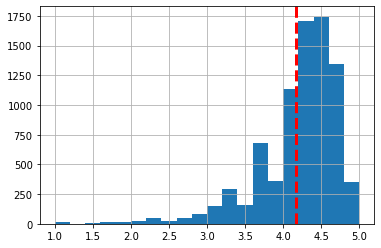

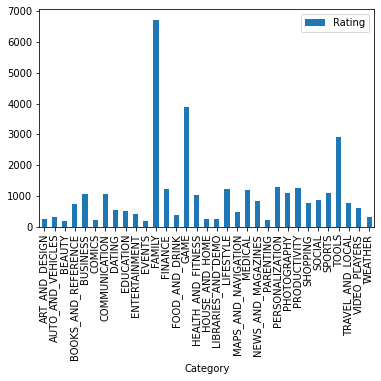

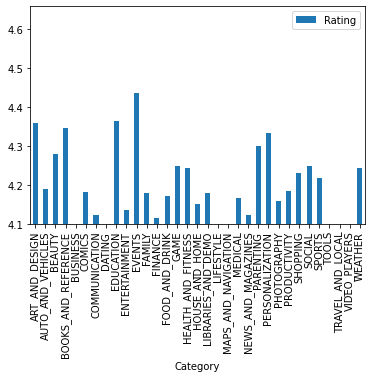

In [4]:
print(apps.sample(5))


print(apps.isna().sum())
print(apps['Rating'].mean())


# How all these apps perform on an average
import matplotlib.pyplot as plt

apps['Rating'].hist(bins=20)
#####################################################################################################################
plt.axvline(apps['Rating'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()



# Distribution of apps according to their ratings
# Vertical dashed line to indicate the average app rating




import matplotlib.pyplot as plt
import numpy as np

apps.pivot_table(values='Rating', index='Category', aggfunc=np.sum).plot(kind='bar')
plt.show()


apps.pivot_table(values='Rating', index='Category', aggfunc=np.mean).plot(kind='bar')
plt.ylim(bottom=4.1)
plt.show()

## 5. Size and price of an app

# *******************************************************************************************************************
# *******************************************************************************************************************
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

# How can we effectively come up with strategies to size and price our app?

    Does the size of an app affect its rating?
    Do users really care about system-heavy apps or do they prefer light-weighted apps?
    Does the price of an app affect its rating?
    Do users always prefer free apps over paid apps?

# We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

In [6]:
print(apps['Rating'].isna().sum())
print(apps['Size'].isna().sum())
print((apps['Rating'].isna().sum()) | (apps['Size'].isna().sum()))


apps_rating_size = apps[~(apps['Rating'].isna()) & ~(apps['Size'].isna())].copy()

print(len(apps_rating_size))
print('\n')


print(apps_rating_size['Installs'].describe())

1463
1227
1535
7027


count    7.027000e+03
mean     4.468208e+06
std      2.713777e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


In [6]:
print(apps['Price'].isna().sum())

0


380
          Installs  % of total
Size_bin                      
(0, 3]    20998245       15.84
(3, 6]    21329115       16.09
(6, 9]    17276825       13.03
(9, 12]   10746230        8.11
(12, 15]   7885620        5.95
(15, 18]   6446611        4.86
(18, 21]   5734226        4.32
(21, 24]   4047430        3.05
(24, 27]   5998336        4.52
(27, 30]   3525760        2.66
(30, 33]   2699200        2.04
(33, 36]   2949460        2.22
(36, 39]   3296120        2.49
(39, 42]   2706010        2.04
(42, 45]   2303900        1.74
(45, 48]   2266610        1.71
(48, 51]   1026610        0.77
(51, 54]    852210        0.64
(54, 57]   1541600        1.16
(57, 60]    938200        0.71
(60, 63]   1605520        1.21
(63, 66]    390200        0.29
(66, 69]    948100        0.72
(69, 72]    939100        0.71
(72, 75]    130610        0.10
(75, 78]    421100        0.32
(78, 81]    151000        0.11
(81, 84]    720510        0.54
(84, 87]    586000        0.44
(87, 90]    216500        0.16
(90,

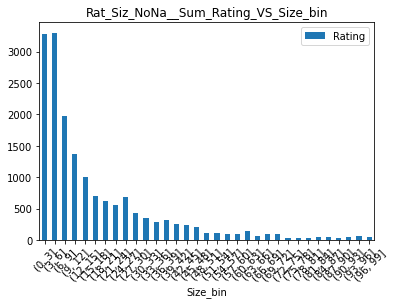

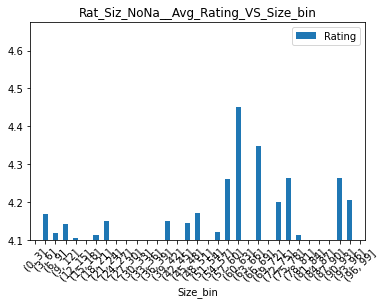

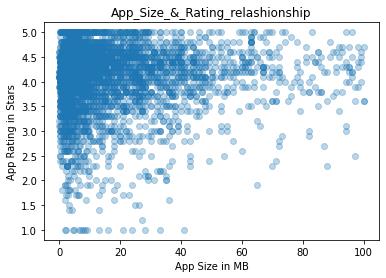

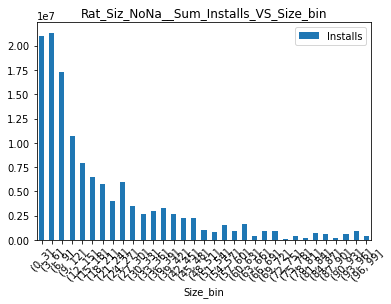

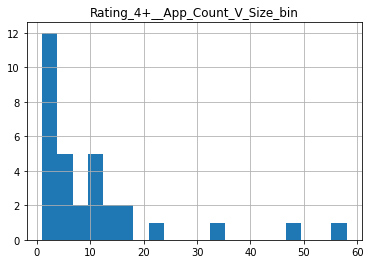

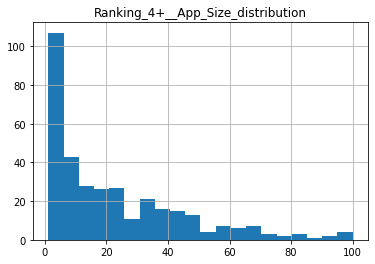

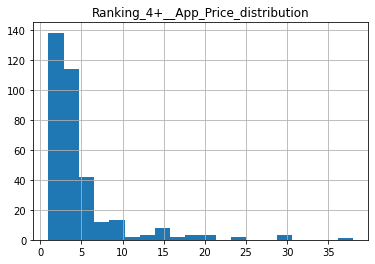

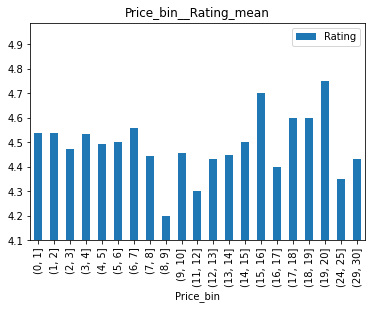

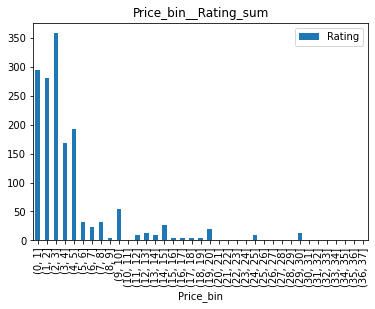

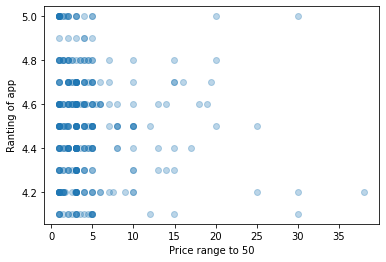

In [25]:
#    Does the size of an app affect its rating?
        # Dont know if I can answer this properly, Size under 15 group seems more popular 
        # - more total Installs, higher total Rating, but on mean isde, it can be hard to explain
    
#    Do users really care about system-heavy apps or do they prefer light-weighted apps?
        # if so, the Rating or Install should be significant diff with Size change, 
        # and yes 10-15 seems really popular
    
#    Does the price of an app affect its rating?
        # same thingas above, just change Size to price, and read the plot
    
#    Do users always prefer free apps over paid apps?
        # same, just group into two, or draw two plot together
    
#####################################################################################################################
#####################################################################################################################

import matplotlib.pyplot as plt

#apps.fillna(0)   # Why fillna?  Does this operation have any influence to our analysis?  Think Why before doing
print(len(apps_rating_size.pivot_table(values='Rating', index='Size', aggfunc=np.sum)))


bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
bins = list(range(0, round(apps_rating_size['Size'].max()), 3))
#####################################################################################################################
apps_rating_size['Size_bin'] = pd.cut(apps_rating_size['Size'], bins)


size_bin_install_table = apps_rating_size.pivot_table(values='Installs', index='Size_bin', aggfunc=np.sum)
size_bin_install_table['% of total'] = round(size_bin_install_table['Installs']/
                                             size_bin_install_table['Installs'].sum()*100, 2)
print(size_bin_install_table)





apps_rating_size.pivot_table(values='Rating', index='Size_bin', aggfunc=np.sum).plot(kind='bar', rot=45)
plt.title('Rat_Siz_NoNa__Sum_Rating_VS_Size_bin')
plt.show()

apps_rating_size.pivot_table(values='Rating', index='Size_bin', aggfunc=np.mean).plot(kind='bar', rot=45)
plt.title('Rat_Siz_NoNa__Avg_Rating_VS_Size_bin')
#####################################################################################################################
plt.ylim(bottom=4.1)
plt.show()



plt.scatter(x=apps_rating_size['Size'], y=apps_rating_size['Rating'], alpha=0.3)
plt.title('App_Size_&_Rating_relashionship')
plt.xlabel('App Size in MB')
plt.ylabel('App Rating in Stars')
#plt.xscale('log')
plt.show()






apps_rating_size.pivot_table(values='Installs', index='Size_bin', aggfunc=np.sum).plot(kind='bar', rot=45)
#####################################################################################################################
plt.title('Rat_Siz_NoNa__Sum_Installs_VS_Size_bin')
plt.show()




over_4_app = apps_rating_size[(apps_rating_size['Rating']>4) & 
                              (apps_rating_size['Size']>1) & 
                              (apps_rating_size['Price']>0) & 
                              (apps_rating_size['Price']<50)].copy()


over_4_app['Good_App_Size_bin'] = pd.cut(over_4_app['Size'].values, range(0, round(over_4_app['Size'].max()), 3))

over_4_app.pivot_table(values='App', index='Good_App_Size_bin', aggfunc=lambda x: len(x.unique())).hist(bins=20)#plot(kind='bar')
plt.title('Rating_4+__App_Count_V_Size_bin')
plt.show()


over_4_app['Size'].hist(bins=20)
plt.title('Ranking_4+__App_Size_distribution')
plt.show()


#print(over_4_app['Price'].describe())
over_4_app['Price'].hist(bins=20)
plt.title('Ranking_4+__App_Price_distribution')
plt.show()





over_4_app['Price_bin'] = pd.cut(over_4_app['Price'], range(0, round(over_4_app['Price'].max()), 1))

over_4_app.pivot_table(values='Rating', index='Price_bin', aggfunc=np.mean).plot(kind='bar')
plt.ylim(bottom=4.1)
plt.title('Price_bin__Rating_mean')
plt.show()


over_4_app.pivot_table(values='Rating', index='Price_bin', aggfunc=np.sum).plot(kind='bar')
plt.title('Price_bin__Rating_sum')
plt.show()



#####################################################################################################################
plt.scatter(x=over_4_app['Price'], y=over_4_app['Rating'], alpha=0.3)
plt.xlabel('Price range to 50')
plt.ylabel('Ranting of app')
#plt.axvline(over_4_app['Price'].median(), color='red', linestyle='dashed', linewidth=3)
plt.show()


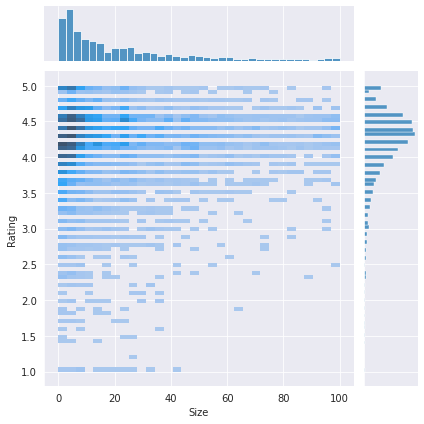

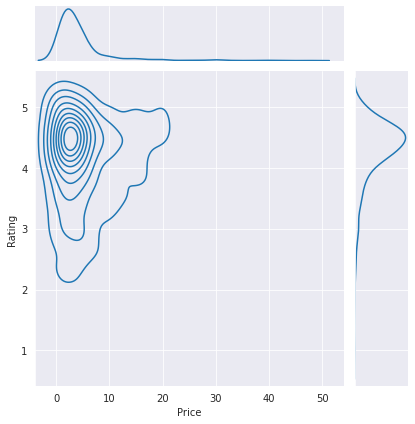

In [14]:
%matplotlib inline
# So we dont need to use plt.show() to display the plots

import seaborn as sns


sns.set_style("darkgrid")



# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 250).copy().reset_index()


# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hist')
#####################################################################################################################




# Subset out apps whose type is 'Paid'
paid_apps = apps[(apps['Type'] == 'Paid') & (apps['Price']<50)].copy()


# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], kind='kde')

## 6. Relation between app category and app price

# *******************************************************************************************************************
# So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

# Different categories demand different price ranges. 
Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

['BUSINESS' 'GAME' 'FAMILY' 'TOOLS']


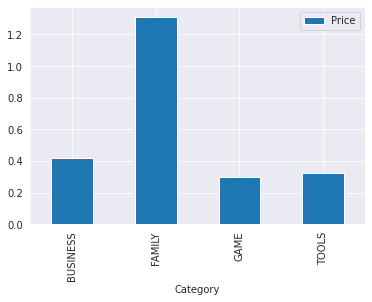

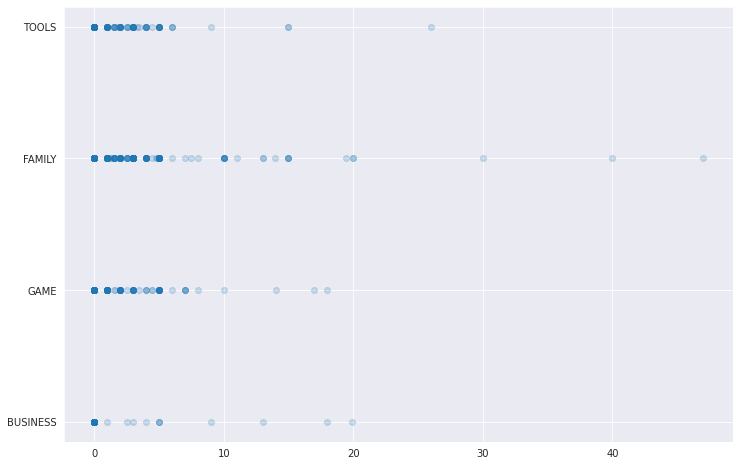

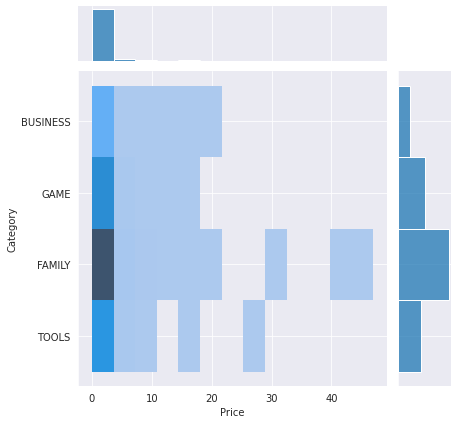

In [52]:
# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 400).copy().reset_index()



print(large_categories['Category'].unique())



large_categories.pivot_table(values='Price', index='Category').plot(kind='bar')
plt.show()



large_categories2 = large_categories[large_categories['Price']<50].copy()


plt.figure(figsize=(12,8))
plt.scatter(x=large_categories2['Price'], y=large_categories2['Category'], alpha=0.2)
plt.show()





%matplotlib inline
# So we dont need to use plt.show() to display the plots

import seaborn as sns


sns.set_style("darkgrid")
plt3 = sns.jointplot(x = large_categories2['Price'], y = large_categories2['Category'], kind = 'hist')



#####################################################################################################################
# It cant convince myself, how can I told the story to others? 

